## Task4 seaborn可视化（一）
- Matplotlib试着让简单的事情更加简单，困难的事情变得可能，而Seaborn就是让困难的东西更加简单。
- seaborn是针对统计绘图的，一般来说，seaborn能满足数据分析90%的绘图需求。
- Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，应该把Seaborn视为matplotlib的补充，而不是替代物。
- 用matplotlib最大的困难是其默认的各种参数，而Seaborn则完全避免了这一问题。

- 本章知识点如下：
    - 导入相关库
    - 加载seaborn自带数据集：load_dataset()
    - 画布主题：set_style()
    - 关系类图表：replot()
    - 散点图：scatterplot()
    - 折线图：lineplot()
    - 分类图表：catplot()
    - 分类散点图：stripplot()和swarmplot()
    - 箱图和增强箱图：boxplot()和boxenplot()
    - 小提琴图：violinplot()
    - 点图：pointplot()
    - 条形图：barplot()
    - 计数图：countplot()
- 小作业：
    - 第一题：绘制多个分类的散点图
    - 第二题：绘制2010年人口年龄结构金字塔
    - 第三题：绘制各年龄段男vs女占比差异线图
    

### 1. 导入相关库

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2.加载seaborn自带数据集

In [3]:
tips = pd.read_csv('./data/tips.csv', engine='python')
fmri = pd.read_csv('./data/fmri.csv', engine='python')
exercise = pd.read_csv('./data/exercise.csv', engine='python')
titanic = pd.read_csv('./data/titanic.csv', engine='python')

### 3.画布主题

- 关于如何调节图像的样式，这一块自由度太高就不具体介绍了，就简单介绍一个修改背景的功能。画布主题共有五种类型：
    - darkgrid: 灰色网格
    - whitegrid: 白色网格
    - dark: 灰色
    - white: 白色
    - ticks: 这个主题比white主题多的是刻度线;
- 利用set_style()来修改，不过这个修改是全局性的，会影响后面所有的图像。

#### 3.1 绘制三条sin函数曲线

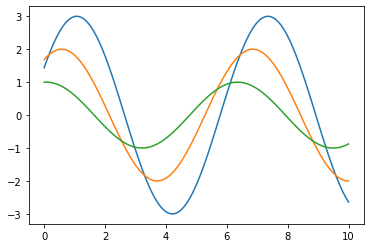

In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 10, 100)
    for i in range(1, 4):
        plt.plot(x, np.sin(x + i * 0.5) * (4 - i) * flip)
sinplot()

#### 3.2 设置背景为默认主题

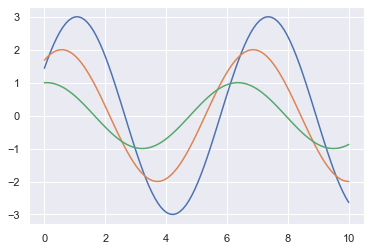

In [5]:
sns.set()  # 默认主题：灰色网格；修改具有全局性
sinplot()

#### 3.3 修改背景为白色网格主题

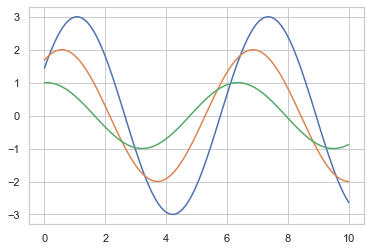

In [6]:
sns.set_style('whitegrid')
sinplot()
# 注：带有网格的主题便于读数

#### 3.4 去掉不必要的边框: sns.despine()

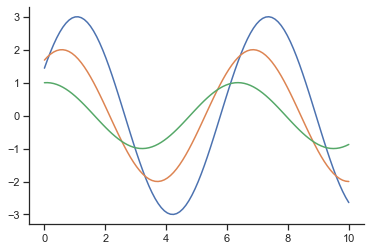

In [7]:
sns.set_style('ticks')
sinplot()  # 这个主题比white主题多的是刻度线
sns.despine()  # 去掉不必要的边框

- 去掉了上边框和有边框，despine()还有别的参数，例如offset参数用于设置轴线偏移，更多参数可以自行搜索相关资料

#### 3.5 设置临时主题：内部白色网格，外部灰色主题

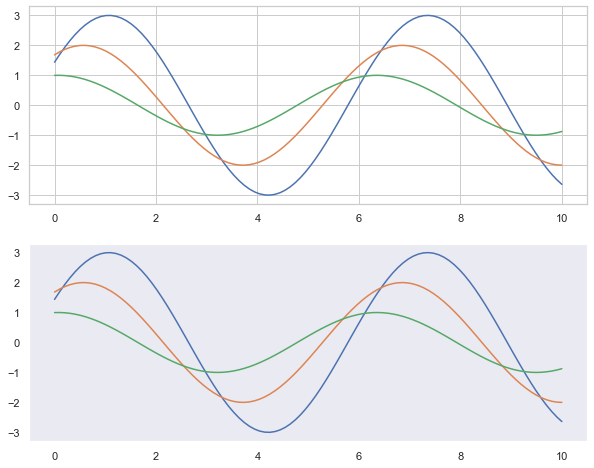

In [8]:
plt.figure(figsize=(10, 8))
sns.set_style('dark')
with sns.axes_style('whitegrid'):  # with内部的都是白色网格主题，对外部不受影响
    plt.subplot(2,1,1)  # 绘制多图函数，两行一列第一个子图
    sinplot()
plt.subplot(2,1,2)  # 两行一列第二个子图
sinplot()
plt.show()

#### 3.6 标签与图形粗细调整：set_context()
- 当需要保存图表时，默认的参数保存下来的图表上刻度值或者标签有可能太小，有些模糊，可以通过set_context()方法设置参数，使保存的图表便于阅读。
- 有4种预设好的上下文(context)，按相对大小排序分别是：
    - paper
    - notebook # 默认
    - talk
    - poster
- 注: 从paper到poster，线条越来越粗

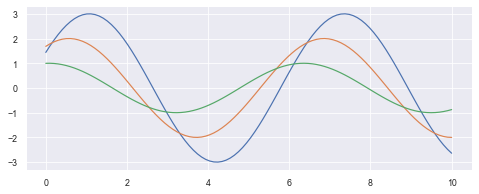

In [12]:
sns.set()
plt.figure(figsize=(8, 3))
sns.set_context('paper')
sinplot()

### 4. 关系类图表: relplot()
- relplot()关系类图表的接口，其实是下面两种图的集成，通过指定kind参数可以画出下面的两种图:
    - scatterplot() 散点图
    - lineplot() 折线图

#### 4.1 基本的散点图

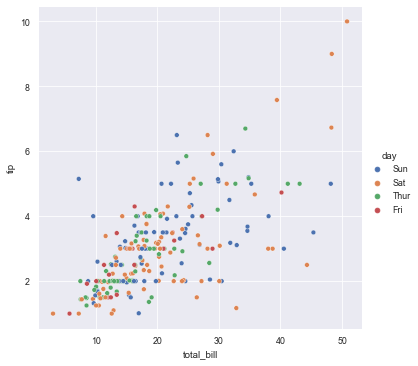

In [13]:
sns.relplot(x='total_bill', y='tip', hue='day', data=tips)

#### 4.2 设置col=列的名称，则根据列的类别展示数据（该列的值有多少种，则将图以多少列线显示）

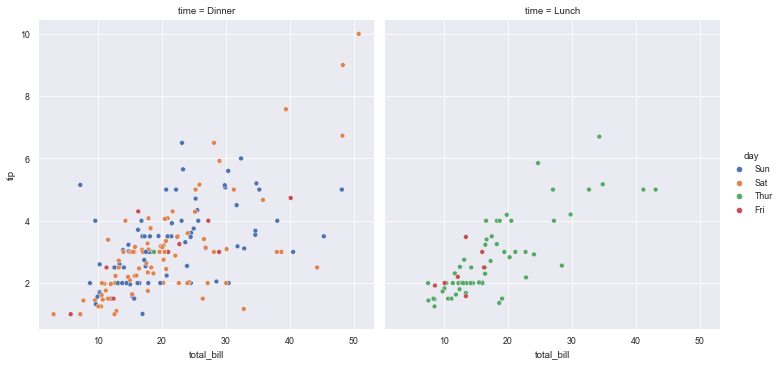

In [14]:
sns.relplot(x='total_bill', y='tip', hue='day', col='time', data=tips)

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 4.3 布局: 如果同时设置col和row，则相同的row在同一行，相同的col在同一列

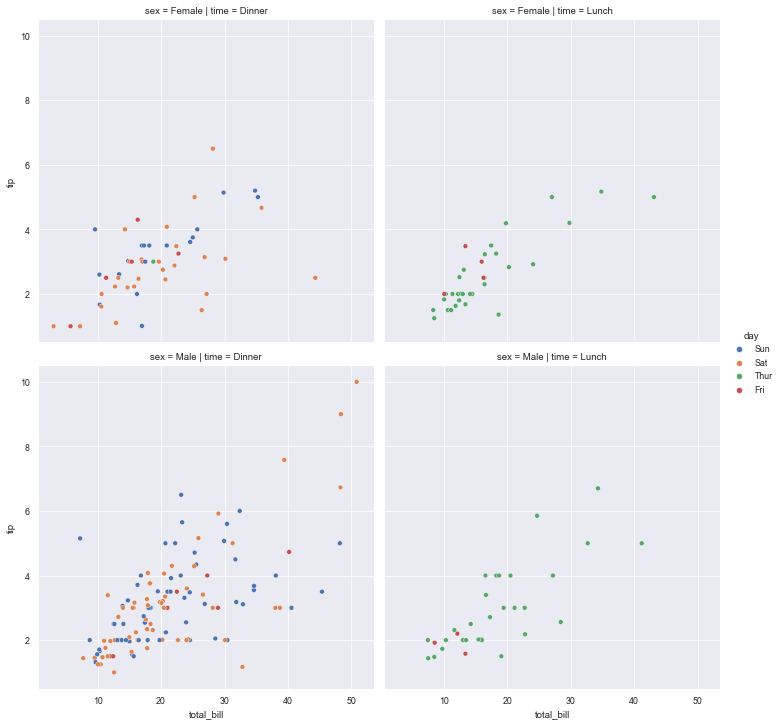

In [18]:
sns.relplot(x='total_bill', y='tip', hue='day', col='time', row='sex', data=tips)

### 5. 散点图: scatterplot()
- 可以通过调整颜色、大小和样式等参数来显示数据之间的关系

#### 5.1 绘制基本散点图

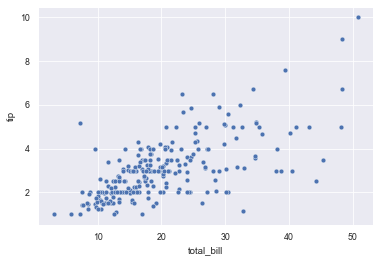

In [19]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

#### 5.2 设置hue，根据设置的类别，产生颜色不同的点的散点图

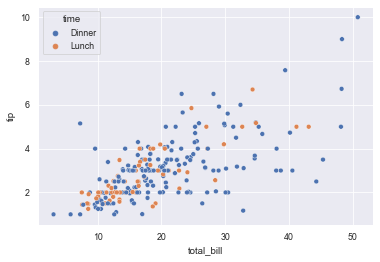

In [21]:
sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)

#### 5.3 设置hue，根据设置的类别，产生颜色不同的点的散点图，设置style，使其生成不同的标记的点

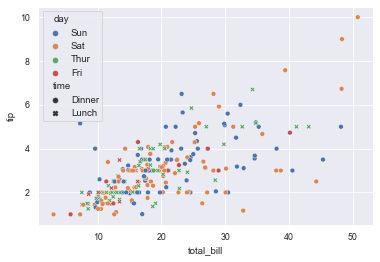

In [22]:
sns.scatterplot(x='total_bill', y='tip', hue='day', style='time', data=tips)

#### 5.4 设置size，根据设置的类别，产生大小不同的点的散点图

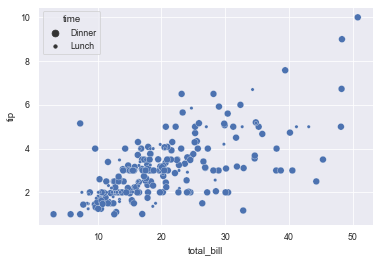

In [23]:
sns.scatterplot(x='total_bill', y='tip', size='time', data=tips)

#### 5.5 使用指定的标记

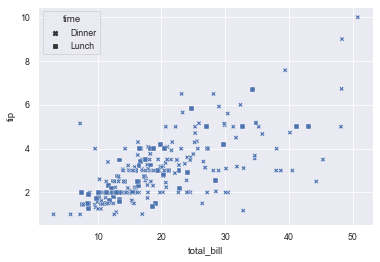

In [25]:
markers = {'Lunch': 's', 'Dinner': 'X'}
sns.scatterplot(x='total_bill', y='tip', style='time',
                markers=markers,
                data=tips)

### 6.折线图: lineplot()

#### 6.1 绘制带有误差带的单线图，显示置信区间

In [26]:
# seaborn自带的fmri数据集
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


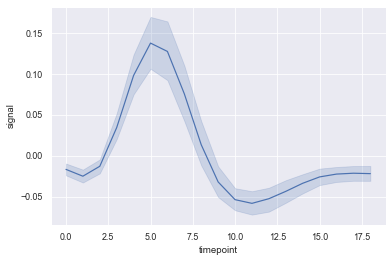

In [27]:
sns.lineplot(x='timepoint', y='signal', data=fmri)

#### 6.2 使用颜色和线型显示分组变量

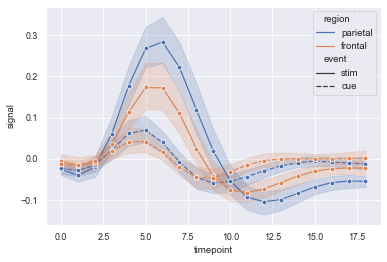

In [28]:
sns.lineplot(x='timepoint', y='signal',
            # 对将要生成不同颜色的线进行分组
            hue='region',
            # 对将生成具有不同破折号、或其他标记的变量进行分组
            style='event',
            # 圆点标注
            marker='o',
            # 数据集
            data=fmri)

### 第一题

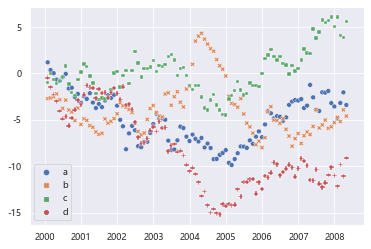

In [48]:
date = pd.date_range(start='2000-01-31', freq='M', periods=100)
cumsum_data = np.cumsum(np.random.randn(100, 4), axis=0)
sns.scatterplot(data=pd.DataFrame(cumsum_data, index=date, columns=['a', 'b', 'c', 'd']))
plt.show()

### 第二题

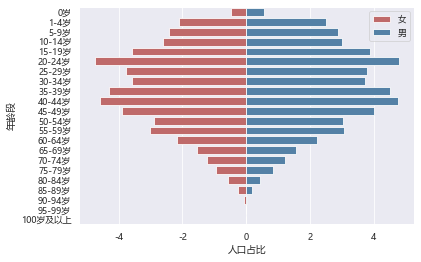

In [49]:
df = pd.read_csv('./data/people.csv', engine='python', encoding='utf-8')
df = df[(df['地区']=='全国') & ((df['性别']=='男') | (df['性别']=='女')) & (df['年龄段']!='合计')]
# 设置中文编码和负号的正常显示
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False
# 添加一列
total_people = df['统计人数'].sum()
df['人口占比'] = round(df['统计人数']/total_people*100, 2)
# 绘制人口年龄结构金字塔（女左男右）
female = df[df['性别']=='女']
male = df[df['性别']=='男']
female['人口占比']=0-female['人口占比']
sns.barplot(y='年龄段',x='人口占比',color='indianred',data=female,label='女')
sns.barplot(y='年龄段',x='人口占比',color='steelblue',data=male,label='男')
plt.legend(loc='best')
plt.show()

### 第三题

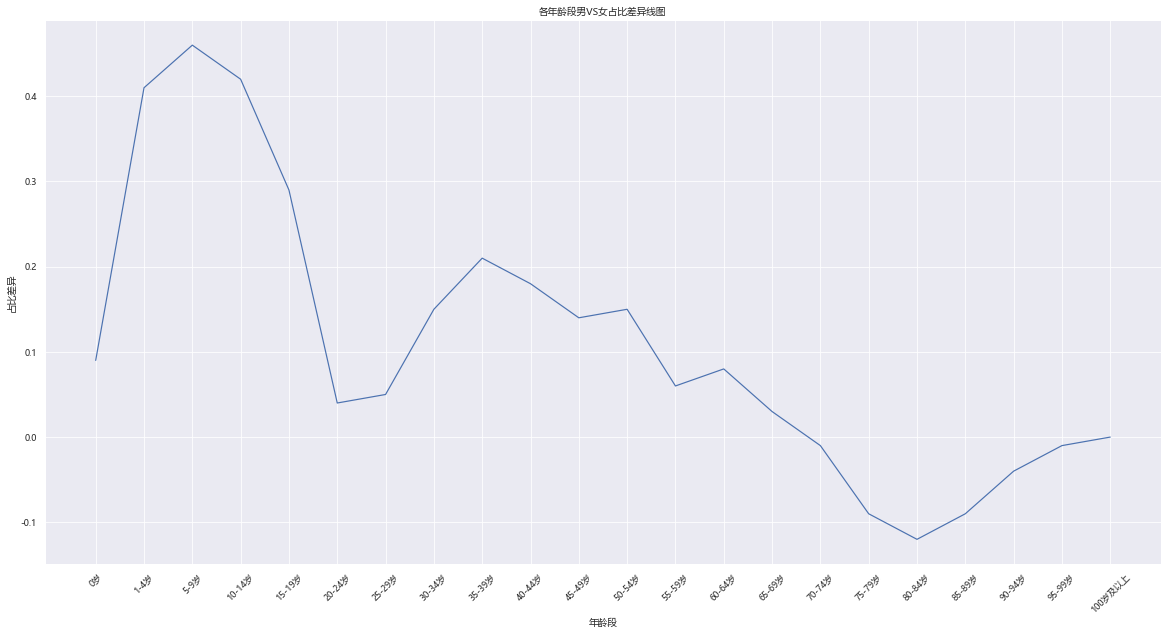

In [50]:
df1 = pd.DataFrame(df['年龄段'].unique(), columns=['年龄段'])
n_female = []
n_male = []
for i in df1['年龄段']:
    n_female.append(0-female[female['年龄段'] == i]['人口占比'].values[0])
    n_male.append(male[male['年龄段'] == i]['人口占比'].values[0])
df1['女占比'] = n_female
df1['男占比'] = n_male
df1['占比差异'] = df1['男占比'] - df1['女占比']
plt.figure(figsize=(20, 10))
sns.lineplot(x = '年龄段',y = '占比差异',data = df1)
plt.title('各年龄段男VS女占比差异线图')
plt.xticks(range(22),df1['年龄段'],rotation = 45)
plt.show()